

```
# Isto` está formatado como código`
```



In [ ]:
!pip install moment

import pandas as pd
import numpy as np 
import datetime as dt
from datetime import date
from datetime import datetime
# from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


# Formatação de tabelas
from google.colab import data_table
data_table.enable_dataframe_formatter()

from sklearn.preprocessing import LabelEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/Shareddrives/modoulo3-grupo3/Base Colaboradores Everymind_Inteli_2020 a 2022vModelo Preditivo.xlsx', 'Everymind')
df_rec = pd.read_excel('/content/drive/Shareddrives/modoulo3-grupo3/Base Colaboradores Everymind_Inteli_2020 a 2022vModelo Preditivo.xlsx', 'Reconhecimento')

In [ ]:
df_rec

,Matricula,Codinome,Situação,Data de Admissão,Data Vigência,Novo Cargo,Novo Salario,Motivo,Alterou Função
0,170.0,Pessoa Colaboradora 161,Afastado,2020-08-17,2022-01-01,Gerente,6609.600,PROMOÇÃO,Sim
1,170.0,Pessoa Colaboradora 161,Afastado,2020-08-17,2021-07-01,Funcional Especialista,4500.000,PROMOÇÃO,Sim
2,173.0,Pessoa Colaboradora 78,Afastado,2015-05-19,2022-01-01,Funcional Especialista,6184.425,MÉRITO,Não
3,237.0,Pessoa Colaboradora 119,Afastado,2021-05-03,2022-05-01,Dev Jr,1719.050,MÉRITO,Não
4,237.0,Pessoa Colaboradora 119,Afastado,2021-05-03,2022-01-01,Dev Jr,1494.825,PROMOÇÃO,Sim
...,...,...,...,...,...,...,...,...,...
334,274.0,Pessoa Colaboradora 392,Desligado,2021-06-01,2021-07-01,Diretor,11500.000,MÉRITO,Não
335,281.0,Pessoa Colaboradora 334,Desligado,2021-07-05,2021-12-01,Dev Pl,3250.000,MÉRITO,Não
336,281.0,Pessoa Colaboradora 334,Desligado,2021-07-05,2021-10-01,Dev Pl,2750.000,PROMOÇÃO,Sim
337,312.0,Pessoa Colaboradora 361,Desligado,2021-09-20,2022-02-01,Funcional Pl,3000.000,MÉRITO,Não


In [ ]:
df

,Matrícula,Nome Completo,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Etnia,Estado Civil,Escolaridade,Estado,Cidade,Area
0,367.0,Pessoa Colaboradora 32,01/02/2022,NaT,NaN,Comercial Pl,2000.000,1982-02-22,Feminino,Branca,Solteiro,Graduação,SP,São Paulo,Vendas
1,20.0,Pessoa Colaboradora 287,2009-04-01 00:00:00,2021-10-29,Pedido de Demissão,Dev Especialista,4406.965,1981-06-16,Masculino,Branca,Solteiro,Graduação,SP,Santos,AMS
2,33.0,Pessoa Colaboradora 349,2018-01-23 00:00:00,2021-11-12,Pedido de Demissão,Dev Especialista,4627.315,1980-12-24,Masculino,Não Informada,Casado,Graduação,SP,São Paulo,Core & Industrias I
3,43.0,Pessoa Colaboradora 285,2018-04-23 00:00:00,2020-02-21,Pedido de Demissão,Dev Especialista,4858.615,1987-06-01,Masculino,Amarela,Solteiro,Graduação,SP,Guarulhos,Core & Industrias I
4,75.0,Pessoa Colaboradora 421,2019-03-19 00:00:00,2020-01-17,Pedido de Demissão,Dev Especialista,837.785,1970-10-26,Masculino,Não Informada,Casado,Pós Graduação,SP,São Paulo,Vendas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,437.0,Pessoa Colaboradora 121,21/03/2022,NaT,NaN,Trainee - Dev,1017.000,1994-10-19,Masculino,Branca,Solteiro,Graduação,SP,Santos,Core & Industrias II
471,494.0,Pessoa Colaboradora 214,01/07/2022,NaT,NaN,Trainee - Funcional,1017.000,2000-05-04,Masculino,Branca,Solteiro,Superior incompleto,SP,Sorocaba,AMS
472,350.0,Pessoa Colaboradora 8,08/12/2021,NaT,NaN,Trainee - Funcional,1017.000,1995-01-31,Feminino,Branca,Casado,Graduação,PR,Catanduvas,CPG & Retail I
473,389.0,Pessoa Colaboradora 228,14/02/2022,NaT,NaN,Trainee - Funcional,1017.000,1978-04-09,Feminino,Parda,Casado,Graduação,PB,João Pessoa,Core & Industrias I


In [ ]:
def resetIndex(data):
  e = data[data.columns[1]].count() 
  ID = []
  i = 0
  while i < e:
    ID.append(i)
    i += 1

  data['index'] = ID
  data.set_index('index', inplace= True)

In [ ]:
df.rename(columns = {'Escolaridade ':'Escolaridade'}, inplace = True)
char = ['Data',' ', 'á', 'ã', 'é', 'ê', 'í', 'ó', 'ú', 'ç', '_de_']
sub_char = ['Dt','_', 'a', 'a', 'e', 'e', 'i', 'o', 'u', 'c', '_']

for i in char:
  e = char.index(i)
  df.columns = df.columns.str.replace(char[e], sub_char[e])
  df_rec.columns = df_rec.columns.str.replace(char[e], sub_char[e])


In [ ]:
today = date.today()
df['Dt_Admissao']= pd.to_datetime(df['Dt_Admissao'])
df['Dt_Admissao'] = df["Dt_Admissao"].dt.strftime("%m-%d-%y")
df['Dt_Admissao']= pd.to_datetime(df['Dt_Admissao'])

df['Dt_Saida']= pd.to_datetime(df['Dt_Saida'])
df['Dt_Saida'] = df["Dt_Saida"].dt.strftime("%m-%d-%y")
df = df.replace(to_replace={'Dt_Saida':{np.nan:today}}, value=None)
df['Dt_Saida']= pd.to_datetime(df['Dt_Saida'])


In [ ]:
dtg = df.select_dtypes(include = "object").columns
for a in dtg:
  df[a] = df[a].str.replace(' ', '')
  df[a] = df[a].str.replace('PessoaColaboradora', 'PC')

dtg = df_rec.select_dtypes(include = "object").columns
for a in dtg:
  df_rec[a] = df_rec[a].str.replace(' ', '')
  df_rec[a] = df_rec[a].str.replace('PessoaColaboradora', 'PC')

In [ ]:
def numOfDays(date1, date2):
    return (date2-date1).days

df['NumeroMeses'] = ""


for i in range(0, len(df['Dt_Admissao'])):
  if df['Tipo_Saida'][i] == str('Ativo'):
    df['NumeroMeses'][i] = (((date.today().year - df['Dt_Admissao'][i].year)*12)+date.today().month - df['Dt_Admissao'][i].month)
  else:
    df['NumeroMeses'][i] = (df['Dt_Saida'][i].year - df['Dt_Admissao'][i].year)*12+df['Dt_Saida'][i].month - df['Dt_Admissao'][i].month

df_rec['Numero_Dias'] = ""


for i in range(0, len(df_rec['Dt_Admissao'])):
  df_rec['Numero_Dias'][i] = df_rec['Dt_Vigencia'][i] - df_rec['Dt_Admissao'][i]
  df_rec['Numero_Dias'][i] = df_rec['Numero_Dias'][i].days

# df_rec['Dt_Admissao'] = df_rec["Dt_Admissao"].dt.strftime("%m-%d-%y")
# df_rec['Dt_Vigencia'] = df_rec["Dt_Vigencia"].dt.strftime("%m-%d-%y")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['NumeroMeses'] = df.NumeroMeses.astype(float)

In [ ]:
df['Situacao']= np.nan
df = df.replace(to_replace={'Tipo_Saida':{np.nan:'nulo'}}, value=None)

for i in df.index:
    if df['Tipo_Saida'][i]== 'nulo':
        df['Situacao'][i] = 1
    else:
        df['Situacao'][i] = 0

df_rec = pd.get_dummies(df_rec, columns = ['Situacao'])
df_rec = df_rec.drop(['Matricula', 'Situacao_Afastado', 'Situacao_Desligado'],axis=1)
df_rec.rename(columns = {'Situacao_Ativo':'Situacao'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
char2 = ['ComercialPl','DevEspecialista','DevJr','DevPl','DevSr','EducaçãoPl','FuncionalEspecialista','FinanceiroJr','FuncionalPl','FuncionalJr','FuncionalPr','FuncionalSr','InfraestruturaJr','MarketingPL','PessoasPl','ScrumMasterJr','TesteJr','TesteSr','ArquitetoSr','Arquiteto','AssistenteII','AssistenteI','AuxiliardeLimpeza','ComercialIS','Consultor','Diretor','Estagiaria','GerenteCSSr','GerentePV','GerenteSr','GerenteCSSr','GerenteVendasIII','GerenteVendasII','GerenteVendasI','Gerente','Trainee-Dev','Trainee-Funcional','VicePresidente']
sub_char2 = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38']

for i in char2:
  e = char2.index(i)
  df['Cargo'] = df['Cargo'].str.replace(char2[e], sub_char2[e])

In [ ]:
char3 = ['Solteiro', 'Casado', 'Divorciado', 'UniãoEstável','Separado']
sub_char3 = ['1', '2', '3', '4','5']

for i in char3:
  e = char3.index(i)
  df['Estado_Civil'] = df['Estado_Civil'].str.replace(char3[e], sub_char3[e])

In [ ]:
df

,Matricula,Nome_Completo,Dt_Admissao,Dt_Saida,Tipo_Saida,Cargo,Salario_Mes,Dt_Nascimento,Genero,Etnia,Estado_Civil,Escolaridade,Estado,Cidade,Area,NumeroMeses,Situacao
0,367.0,PC32,2022-01-02,2022-09-09,nulo,1,2000.000,1982-02-22,Feminino,Branca,1,Graduação,SP,SãoPaulo,Vendas,8.0,1.0
1,20.0,PC287,2009-04-01,2021-10-29,PedidodeDemissão,2,4406.965,1981-06-16,Masculino,Branca,1,Graduação,SP,Santos,AMS,150.0,0.0
2,33.0,PC349,2018-01-23,2021-11-12,PedidodeDemissão,2,4627.315,1980-12-24,Masculino,NãoInformada,2,Graduação,SP,SãoPaulo,Core&IndustriasI,46.0,0.0
3,43.0,PC285,2018-04-23,2020-02-21,PedidodeDemissão,2,4858.615,1987-06-01,Masculino,Amarela,1,Graduação,SP,Guarulhos,Core&IndustriasI,22.0,0.0
4,75.0,PC421,2019-03-19,2020-01-17,PedidodeDemissão,2,837.785,1970-10-26,Masculino,NãoInformada,2,PósGraduação,SP,SãoPaulo,Vendas,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,437.0,PC121,2022-03-21,2022-09-09,nulo,36,1017.000,1994-10-19,Masculino,Branca,1,Graduação,SP,Santos,Core&IndustriasII,6.0,1.0
471,494.0,PC214,2022-01-07,2022-09-09,nulo,37,1017.000,2000-05-04,Masculino,Branca,1,Superiorincompleto,SP,Sorocaba,AMS,8.0,1.0
472,350.0,PC8,2021-08-12,2022-09-09,nulo,37,1017.000,1995-01-31,Feminino,Branca,2,Graduação,PR,Catanduvas,CPG&RetailI,13.0,1.0
473,389.0,PC228,2022-02-14,2022-09-09,nulo,37,1017.000,1978-04-09,Feminino,Parda,2,Graduação,PB,JoãoPessoa,Core&IndustriasI,7.0,1.0


In [ ]:
char4 = ['PósGraduação', 'Graduação', 'Mestrado', 'Superiorincompleto','EnsinoMédioIncompleto','EnsinoMédio','Técnico']
sub_char4 = ['1', '2', '3', '4','5','6','7']
for i in char4:
  e = char4.index(i)
  df['Escolaridade'] = df['Escolaridade'].str.replace(char4[e], sub_char4[e])

In [ ]:
df.Genero[df.Genero == 'Masculino'] = 1
df.Genero[df.Genero == 'Feminino'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['Cargo'] = df.Cargo.astype(float)
df['Genero'] = df.Genero.astype(float)
df['Estado_Civil'] = df.Estado_Civil.astype(float)
df['Escolaridade'] = df.Escolaridade.astype(float)


In [ ]:
df = df.drop(['Matricula','Estado','Cidade', 'Dt_Nascimento', 'Dt_Saida', 'Etnia'],axis=1)


In [ ]:
df

,Nome_Completo,Dt_Admissao,Tipo_Saida,Cargo,Salario_Mes,Genero,Estado_Civil,Escolaridade,Area,NumeroMeses,Situacao
0,PC32,2022-01-02,nulo,1.0,2000.000,0.0,1.0,2.0,Vendas,8.0,1.0
1,PC287,2009-04-01,PedidodeDemissão,2.0,4406.965,1.0,1.0,2.0,AMS,150.0,0.0
2,PC349,2018-01-23,PedidodeDemissão,2.0,4627.315,1.0,2.0,2.0,Core&IndustriasI,46.0,0.0
3,PC285,2018-04-23,PedidodeDemissão,2.0,4858.615,1.0,1.0,2.0,Core&IndustriasI,22.0,0.0
4,PC421,2019-03-19,PedidodeDemissão,2.0,837.785,1.0,2.0,1.0,Vendas,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
470,PC121,2022-03-21,nulo,36.0,1017.000,1.0,1.0,2.0,Core&IndustriasII,6.0,1.0
471,PC214,2022-01-07,nulo,37.0,1017.000,1.0,1.0,4.0,AMS,8.0,1.0
472,PC8,2021-08-12,nulo,37.0,1017.000,0.0,2.0,2.0,CPG&RetailI,13.0,1.0
473,PC228,2022-02-14,nulo,37.0,1017.000,0.0,2.0,2.0,Core&IndustriasI,7.0,1.0


In [ ]:
df_rec

,Codinome,Dt_Admissao,Dt_Vigencia,Novo_Cargo,Novo_Salario,Motivo,Alterou_Funcao,Numero_Dias,Situacao
0,PC161,2020-08-17,2022-01-01,Gerente,6609.600,PROMOÇÃO,Sim,502,0
1,PC161,2020-08-17,2021-07-01,FuncionalEspecialista,4500.000,PROMOÇÃO,Sim,318,0
2,PC78,2015-05-19,2022-01-01,FuncionalEspecialista,6184.425,MÉRITO,Não,2419,0
3,PC119,2021-05-03,2022-05-01,DevJr,1719.050,MÉRITO,Não,363,0
4,PC119,2021-05-03,2022-01-01,DevJr,1494.825,PROMOÇÃO,Sim,243,0
...,...,...,...,...,...,...,...,...,...
334,PC392,2021-06-01,2021-07-01,Diretor,11500.000,MÉRITO,Não,30,0
335,PC334,2021-07-05,2021-12-01,DevPl,3250.000,MÉRITO,Não,149,0
336,PC334,2021-07-05,2021-10-01,DevPl,2750.000,PROMOÇÃO,Sim,88,0
337,PC361,2021-09-20,2022-02-01,FuncionalPl,3000.000,MÉRITO,Não,134,0


In [ ]:
df_mod = df_rec
df_mod = df_mod.drop(['Novo_Cargo','Novo_Salario', 'Motivo', 'Alterou_Funcao'],axis=1)
df_mod = df_mod.sort_values( by="Codinome", ascending=True)

In [ ]:
df_alt = df_mod.drop_duplicates(subset='Codinome', keep = 'first')
df_dupl = df_mod.loc[df_mod.duplicated(subset='Codinome')]
df_mod['Codinome'].unique()

array(['PC10', 'PC101', 'PC103', 'PC106', 'PC108', 'PC113', 'PC115',
       'PC116', 'PC117', 'PC118', 'PC119', 'PC120', 'PC122', 'PC125',
       'PC127', 'PC130', 'PC131', 'PC134', 'PC137', 'PC14', 'PC145',
       'PC146', 'PC148', 'PC15', 'PC157', 'PC16', 'PC161', 'PC162',
       'PC165', 'PC167', 'PC168', 'PC169', 'PC171', 'PC185', 'PC188',
       'PC189', 'PC190', 'PC192', 'PC196', 'PC199', 'PC20', 'PC200',
       'PC201', 'PC202', 'PC204', 'PC209', 'PC210', 'PC215', 'PC216',
       'PC219', 'PC22', 'PC221', 'PC223', 'PC224', 'PC227', 'PC23',
       'PC230', 'PC231', 'PC233', 'PC236', 'PC238', 'PC24', 'PC242',
       'PC243', 'PC244', 'PC246', 'PC247', 'PC250', 'PC253', 'PC258',
       'PC260', 'PC261', 'PC265', 'PC267', 'PC269', 'PC270', 'PC272',
       'PC273', 'PC274', 'PC275', 'PC277', 'PC279', 'PC282', 'PC287',
       'PC29', 'PC290', 'PC291', 'PC293', 'PC295', 'PC296', 'PC30',
       'PC316', 'PC322', 'PC324', 'PC328', 'PC33', 'PC334', 'PC335',
       'PC336', 'PC341', 'PC344

In [ ]:
resetIndex(df_alt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_alt['@1'], df_alt['@2'], df_alt['@3'], df_alt['@4'], df_alt['@5'], df_alt['@6'], df_alt['Numero_Promocoes'], df_alt['Tempo_Medio_Promocoes'] = ['0', '0', '0', '0', '0', '0', '0', '0']
df_alt.columns = df_alt.columns.str.replace('@', 'Promocao_')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for i in df_alt.index:
  e = df_alt['Codinome'][i]
  df_temp = df_mod.query("Codinome in @e").sort_values( by="Numero_Dias", ascending=True)
  resetIndex(df_temp)
  # print(df_temp)
  for e in df_temp.index:
    if e == 0:
      df_alt['Promocao_1'][i] = df_temp['Numero_Dias'][e]
      df_alt['Numero_Promocoes'][i] = 1
    elif e == 1:
      df_alt['Promocao_2'][i] = df_temp['Numero_Dias'][e]
      df_alt['Numero_Promocoes'][i] = 2
    elif e == 2:
      df_alt['Promocao_3'][i] = df_temp['Numero_Dias'][e]
      df_alt['Numero_Promocoes'][i] = 3
    elif e == 3:
      df_alt['Promocao_4'][i] = df_temp['Numero_Dias'][e]
      df_alt['Numero_Promocoes'][i] = 4
    elif e == 4:
      df_alt['Promocao_5'][i] = df_temp['Numero_Dias'][e]
      df_alt['Numero_Promocoes'][i] = 5
    elif e == 5:
      df_alt['Promocao_6'][i] = df_temp['Numero_Dias'][e]
      df_alt['Numero_Promocoes'][i] = 6

df_alt.drop(['Numero_Dias', 'Dt_Vigencia'], axis=1, inplace=True)
df_alt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying

,Codinome,Dt_Admissao,Situacao,Promocao_1,Promocao_2,Promocao_3,Promocao_4,Promocao_5,Promocao_6,Numero_Promocoes,Tempo_Medio_Promocoes
index,,,,,,,,,,,
0,PC10,2022-02-14,1,137,0,0,0,0,0,1,0
1,PC101,2019-12-02,1,547,608,792,0,0,0,3,0
2,PC103,2021-11-03,1,118,210,0,0,0,0,2,0
3,PC106,2019-05-06,1,361,818,879,0,0,0,3,0
4,PC108,2021-04-12,1,142,295,323,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
168,PC86,2017-02-01,1,1399,1734,0,0,0,0,2,0
169,PC9,2020-02-03,1,302,484,879,0,0,0,3,0
170,PC92,2015-03-26,1,1924,2047,2320,2504,0,0,4,0


In [ ]:
df_alt_mean = df_alt['Promocao_1'].mean()
df_alt_mean

488.19075144508673

In [ ]:
for i in df_alt.index:
  if df_alt['Numero_Promocoes'][i] == 1:
    df_alt['Tempo_Medio_Promocoes'][i] = int(df_alt['Promocao_1'][i]/df_alt['Numero_Promocoes'][i])
  elif df_alt['Numero_Promocoes'][i] == 2:
    df_alt['Tempo_Medio_Promocoes'][i] = int(df_alt['Promocao_2'][i]/df_alt['Numero_Promocoes'][i])
  elif df_alt['Numero_Promocoes'][i] == 3:
    df_alt['Tempo_Medio_Promocoes'][i] = int(df_alt['Promocao_3'][i]/df_alt['Numero_Promocoes'][i])
  elif df_alt['Numero_Promocoes'][i] == 4:
    df_alt['Tempo_Medio_Promocoes'][i] = int(df_alt['Promocao_4'][i]/df_alt['Numero_Promocoes'][i])
  elif df_alt['Numero_Promocoes'][i] == 5:
    df_alt['Tempo_Medio_Promocoes'][i] = int(df_alt['Promocao_5'][i]/df_alt['Numero_Promocoes'][i])
  elif df_alt['Numero_Promocoes'][i] == 6:
    df_alt['Tempo_Medio_Promocoes'][i] = int(df_alt['Promocao_6'][i]/df_alt['Numero_Promocoes'][i])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying 

In [ ]:
df_alt.rename(columns = {'Codinome':'Nome_Completo'}, inplace = True)

dtg = df_alt.select_dtypes(include = "object").columns
for a in dtg:
  df_alt[a] = df_alt[a].replace('0', np.nan)
df_alt

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Nome_Completo,Dt_Admissao,Situacao,Promocao_1,Promocao_2,Promocao_3,Promocao_4,Promocao_5,Promocao_6,Numero_Promocoes,Tempo_Medio_Promocoes
index,,,,,,,,,,,
0,PC10,2022-02-14,1,137,NaN,NaN,NaN,NaN,NaN,1,137
1,PC101,2019-12-02,1,547,608.0,792.0,NaN,NaN,NaN,3,264
2,PC103,2021-11-03,1,118,210.0,NaN,NaN,NaN,NaN,2,105
3,PC106,2019-05-06,1,361,818.0,879.0,NaN,NaN,NaN,3,293
4,PC108,2021-04-12,1,142,295.0,323.0,NaN,NaN,NaN,3,107
...,...,...,...,...,...,...,...,...,...,...,...
168,PC86,2017-02-01,1,1399,1734.0,NaN,NaN,NaN,NaN,2,867
169,PC9,2020-02-03,1,302,484.0,879.0,NaN,NaN,NaN,3,293
170,PC92,2015-03-26,1,1924,2047.0,2320.0,2504.0,NaN,NaN,4,626


In [ ]:
df_sort = df.sort_values( by="Nome_Completo", ascending=True)
resetIndex(df_sort)

In [ ]:
integrated_dfs = pd.merge(df_sort, df_alt,how="left", on= ["Nome_Completo", "Dt_Admissao", "Situacao"])

integrated_dfs

,Nome_Completo,Dt_Admissao,Tipo_Saida,Cargo,Salario_Mes,Genero,Estado_Civil,Escolaridade,Area,NumeroMeses,Situacao,Promocao_1,Promocao_2,Promocao_3,Promocao_4,Promocao_5,Promocao_6,Numero_Promocoes,Tempo_Medio_Promocoes
0,PC1,2022-06-06,nulo,9.0,2250.0,1.0,2.0,4.0,CPG&RetailI,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PC10,2022-02-14,nulo,10.0,1600.0,0.0,1.0,4.0,Core&IndustriasII,7.0,1.0,137,NaN,NaN,NaN,NaN,NaN,1,137
2,PC100,2022-02-03,nulo,14.0,4000.0,0.0,1.0,4.0,AgenciaDigital,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PC101,2019-02-12,nulo,12.0,4957.2,1.0,3.0,2.0,Core&IndustriasI,43.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PC102,2021-04-10,nulo,32.0,8715.9,1.0,1.0,1.0,Vendas,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,PC95,2022-04-07,nulo,36.0,1017.0,1.0,1.0,4.0,AgenciaDigital,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471,PC96,2022-03-16,nulo,36.0,1017.0,1.0,1.0,4.0,CPG&RetailII,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,PC97,2022-04-07,nulo,36.0,1017.0,1.0,1.0,4.0,CPG&Retail,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,PC98,2020-04-13,nulo,5.0,4681.8,1.0,2.0,1.0,CPG&RetailI,29.0,1.0,444,NaN,NaN,NaN,NaN,NaN,1,444


In [ ]:
n = 0
for i in integrated_dfs['Numero_Promocoes'].isnull():
    if i == True:
      integrated_dfs['Numero_Promocoes'][n] = 0
    n += 1

integrated_dfs['Numero_Promocoes'].isnull()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0      False
1      False
2      False
3      False
4      False
       ...  
470    False
471    False
472    False
473    False
474    False
Name: Numero_Promocoes, Length: 475, dtype: bool

In [ ]:
integrated_dfs

,Nome_Completo,Dt_Admissao,Tipo_Saida,Cargo,Salario_Mes,Genero,Estado_Civil,Escolaridade,Area,NumeroMeses,Situacao,Promocao_1,Promocao_2,Promocao_3,Promocao_4,Promocao_5,Promocao_6,Numero_Promocoes,Tempo_Medio_Promocoes
0,PC1,2022-06-06,nulo,9.0,2250.0,1.0,2.0,4.0,CPG&RetailI,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,PC10,2022-02-14,nulo,10.0,1600.0,0.0,1.0,4.0,Core&IndustriasII,7.0,1.0,137,NaN,NaN,NaN,NaN,NaN,1,137
2,PC100,2022-02-03,nulo,14.0,4000.0,0.0,1.0,4.0,AgenciaDigital,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,PC101,2019-02-12,nulo,12.0,4957.2,1.0,3.0,2.0,Core&IndustriasI,43.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,PC102,2021-04-10,nulo,32.0,8715.9,1.0,1.0,1.0,Vendas,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,PC95,2022-04-07,nulo,36.0,1017.0,1.0,1.0,4.0,AgenciaDigital,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
471,PC96,2022-03-16,nulo,36.0,1017.0,1.0,1.0,4.0,CPG&RetailII,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
472,PC97,2022-04-07,nulo,36.0,1017.0,1.0,1.0,4.0,CPG&Retail,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
473,PC98,2020-04-13,nulo,5.0,4681.8,1.0,2.0,1.0,CPG&RetailI,29.0,1.0,444,NaN,NaN,NaN,NaN,NaN,1,444


#Passo 1: estimar com base na coluna 'Value'


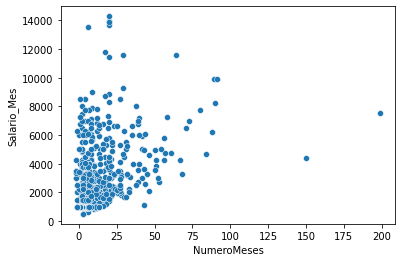

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data = df, x = 'NumeroMeses', y = 'Salario_Mes')

### Precisamos dividir algumas coisas:

1. Precisamos dividir o que é característica (x) do que é o valor a ser predito (y)
2. Também precisamos dividir o que vai ser usado para treinar o modelo e o que vai ser usado para verificar a performance do modelo.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividindo x e y
x = df[['Salario_Mes', 'NumeroMeses','Genero','Cargo']]
     
y = df[['Situacao']]


In [ ]:
# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1) # qualquer valor como semente do pseudo-rando

In [ ]:
x_train.shape

(380, 4)

In [ ]:
y_train.shape

(380, 1)

#Normalizar Dados

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler = RobustScaler()
scaler.fit(x_train)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Fazer o undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_train, y_train = rus.fit_resample(x_train, y_train)

In [ ]:
x_train.shape

(304, 4)

In [ ]:
y_train.shape

(304, 1)

## Regressao Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

# Criando o modelo
model = LogisticRegression()
model.fit(x_train, y_train)

# Predizendo
y_pred = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Feature: Tipo_Saida, Score: 0.07589
Feature: Cargo, Score: 0.07267
Feature: Salario_Mes, Score: -0.22771
Feature: Genero, Score: 0.56927


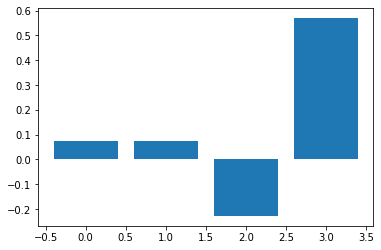

In [ ]:
import matplotlib.pyplot as plt

# Avaliar a importância das features
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (df.columns.values[i + 2],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

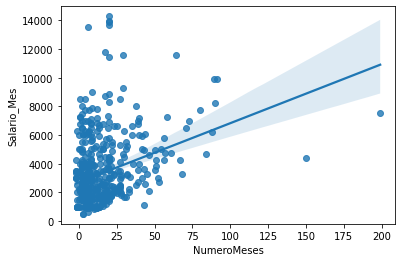

In [ ]:
sns.regplot(data = df, x = 'NumeroMeses', y = 'Salario_Mes')

### Avaliando o modelo
Várias são as métricas que podemos usar para avaliar um modelo de regressão. Aqui vamos conversar sobre as 3 mais comuns:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_squared_error(y_test, y_pred)

0.28421052631578947

In [ ]:
mean_absolute_error(y_test, y_pred)

0.28421052631578947

In [ ]:
r2_score(y_test, y_pred)

-0.17445054945054972

## Visualizar a distribuição das classes (Plotly)

In [ ]:
import plotly.express as px

fig = px.scatter(df, x="Salario_Mes", y="NumeroMeses", color="Situacao",
                 hover_data=['Genero'])
fig.show()

# Previsão com 2 features

Vamos utilizar Age e Na_to_K

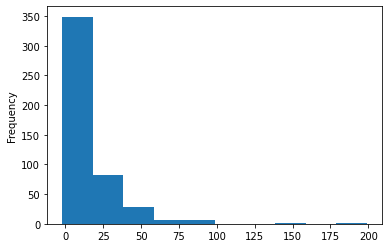

In [ ]:
df.NumeroMeses.plot.hist()

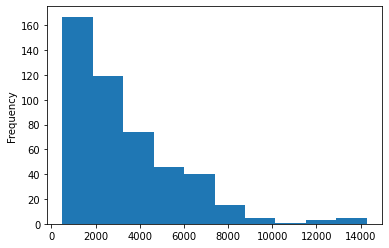

In [ ]:
df.Salario_Mes.plot.hist()

### Realizando predições

Predição de classe

In [ ]:
# realizando predições com o conjunto de teste
y_pred = knn.predict(x_test)

Probabilidade da predição por classe e por amostra do x_test

In [ ]:
# probabilidade de cada classe
y_prob = knn.predict_proba(x_test)

### Matriz de Confusão

No campo do Aprendizado de Máquina uma matriz de confusão é uma tabela que permite a visualização do desempenho de um algoritmo de classificação.

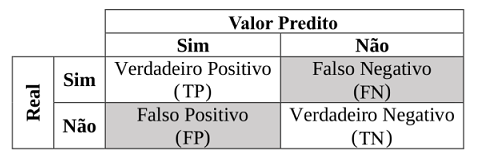

Com ela é possivel identificar viés do modelo em relação a uma ou mais classes, cenário comum em dados desbalanceados.

In [ ]:
# lembrando que o y verdadeiro para o conjunto de teste é o y_test
y_true = y_test

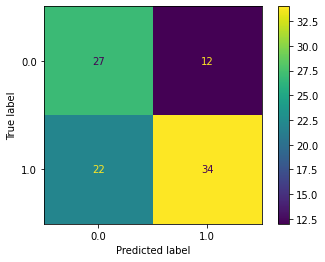

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Cria a matriz de confusão
cm = confusion_matrix(y_true, y_pred)
cm


# versão visual mais bonita da matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=knn.classes_)

disp.plot()
plt.show()

## KNN (K Nearest Neighbor)


A ideia principal do KNN é determinar o rótulo de classificação de uma amostra baseado nas amostras vizinhas advindas de um conjunto de treinamento.


Acuracidade (treino):  0.7335526315789473
Acuracidade (teste):  0.6421052631578947


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



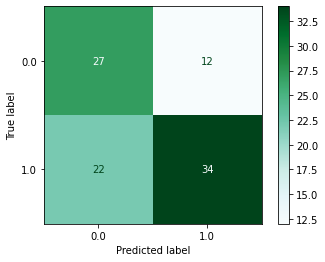

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instaciação do obj Algoritmo
knn = KNeighborsClassifier(n_neighbors=7)
# Treino # x = Features, y = Label/Target
knn.fit( x_train, y_train.squeeze() ) # squeeze() -> df para series


# Teste de Acuracidade (accuracy)
print('Acuracidade (treino): ', knn.score( x_train, y_train ))
print('Acuracidade (teste): ', knn.score( x_test, y_test ))


# Matriz de confusão do modelo Random Forest
plot_confusion_matrix(knn, x_test, y_test, cmap='BuGn')

## Decision Tree

As Árvores de Decisão são um método de aprendizado supervisionado não paramétrico usado para classificação e regressão. O objetivo é criar um modelo que preveja o valor de uma variável de destino aprendendo regras de decisão simples inferidas a partir dos recursos de dados

Acuracidade (treino):  0.993421052631579
Acuracidade (teste):  0.6842105263157895


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



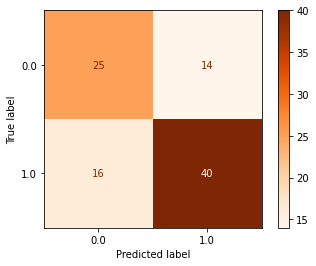

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

# Criando o modelo Arvore de Decisão
dt = DecisionTreeClassifier() 

# Treinando e rodando o modelo
dt.fit( x_train, y_train.squeeze() ) 

# Teste de Acuracidade (accuracy)
print('Acuracidade (treino): ', dt.score( x_train, y_train ))
print('Acuracidade (teste): ', dt.score( x_test, y_test ))

# Matriz de confusão do modelo Random Forest
plot_confusion_matrix(dt, x_test, y_test, cmap='Oranges')

##REPRESENTACAO

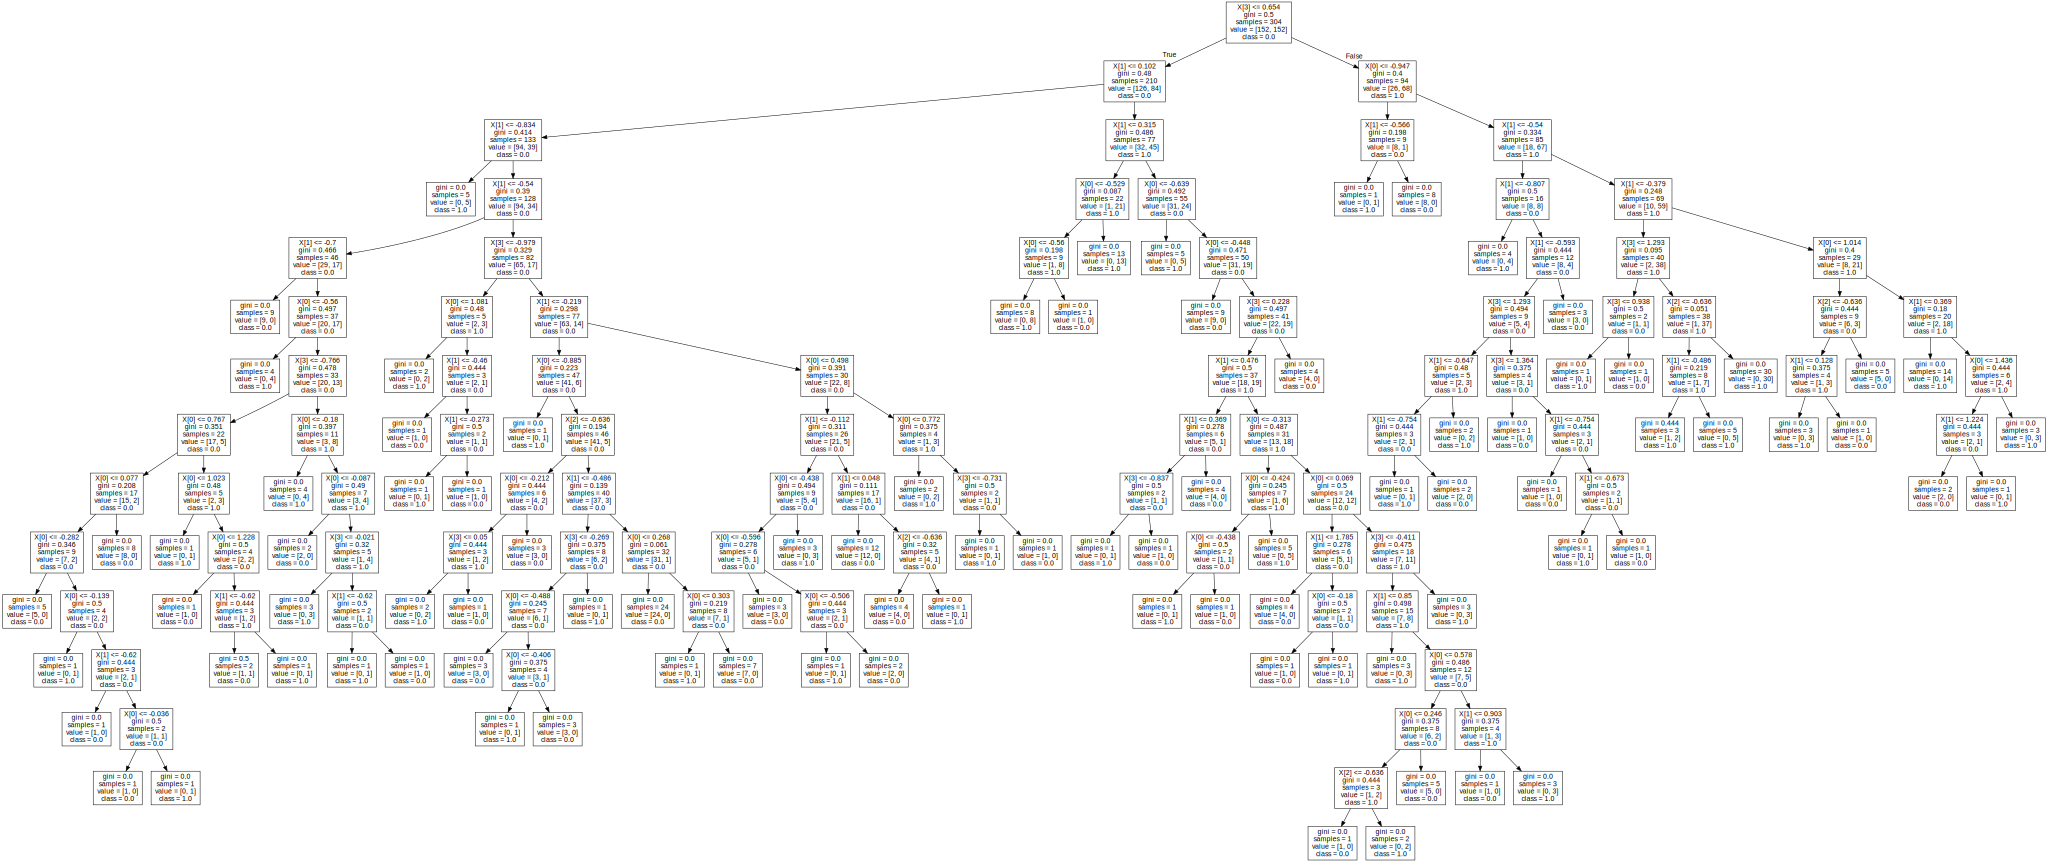

In [ ]:
from sklearn.tree import export_graphviz 
import graphviz


# Composição e montagem Arvore
dot_data = export_graphviz(dt, out_file=None, class_names=list(map(str, dt.classes_))) 
graph = graphviz.Source(dot_data)
graph.render('Arvore.pdf')
graph

## Random Forest

Acc treino:  0.993421052631579
Acc teste:  0.7052631578947368


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



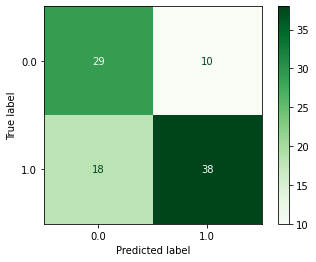

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

#Treino e teste do modelo Random Forest
modelo = RandomForestClassifier()
modelo.fit( x_train, y_train.squeeze() )


#Métrica de acurácia do modelo Random Forest
print('Acc treino: ', modelo.score(x_train, y_train ))
print('Acc teste: ', modelo.score(x_test, y_test.squeeze() ))

#Matriz de confusão do modelo Random Forest
plot_confusion_matrix(modelo, x_test, y_test, cmap='Greens')

## SVM


Acuracidade (treino):  0.6710526315789473
Acuracidade (teste):  0.6736842105263158


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



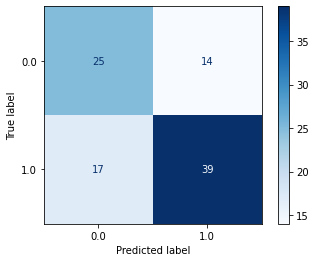

In [ ]:
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix


#Treino e teste do modelo SVM (Support Vector Machines)
clf = svm.SVC()
clf.fit(x_train, y_train)

#Métrica de acurácia do modelo SVM
print('Acuracidade (treino): ', clf.score(x_train, y_train))
print('Acuracidade (teste): ', clf.score(x_test, y_test))

#Matriz de confusão do modelo SVM
plot_confusion_matrix(clf, x_test, y_test, cmap='Blues')

##Naive bayes predictive model

Naive Bayes score:  0.6947368421052632
Acuracidade (treino):  0.618421052631579


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



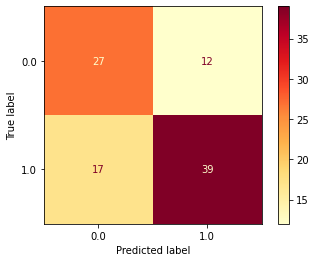

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Treino/teste Implementação naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)

# Métrica de acurácia do modelo Naive Bayes
print("Naive Bayes score: ",nb.score(x_test, y_test))
print('Acuracidade (treino): ', nb.score(x_train, y_train))



# Matriz de confusão do modelo Naive Bayes
plot_confusion_matrix(nb, x_test, y_test, cmap='YlOrRd')

## XGBoost

Acc treino 0.9046052631578947
Acc teste 0.7894736842105263


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



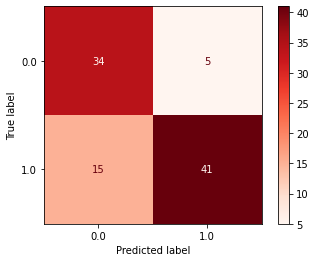

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Criando modelo XGBoost
xgb = GradientBoostingClassifier()

# Treinando e rodando o modelo
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

# Metrica e resultado do modelo XGBoost
print('Acc treino', xgb.score(x_train, y_train))
print('Acc teste', xgb.score(x_test, y_test.squeeze()))


# Matriz de confusão do modelo XGBoost
plot_confusion_matrix(xgb, x_test, y_test, cmap='Reds')


## AdaBoost

Acc treino:  0.805921052631579
Acc teste:  0.7789473684210526


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



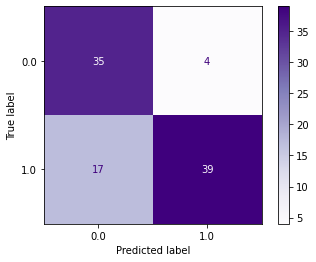

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Criando o modelo AdaBoost
model = AdaBoostClassifier()

# Treinando e rodando o modelo
model.fit(x_train, y_train.squeeze())
y_pred = model.predict(x_test)

# Metrica e resultado do modelo XGBoost
print('Acc treino: ', model.score(x_train, y_train ))
print('Acc teste: ', model.score(x_test, y_test.squeeze() ))

# Matriz de confusão do modelo AdaBoost
plot_confusion_matrix(model, x_test, y_test, cmap='Purples')